## Ejemplo 4: Estadísticos de Orden

### 1. Objetivos:
    - Aprender a calcular el rango y los percentiles usando pandas
 
---
    
### 2. Desarrollo:

#### Rango

El rango es simplemente la diferencia entre el valor máximo de un conjunto y el valor mínimo de un conjunto. Por lo tanto, podemos obtenerla de esta manera:

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)

In [ ]:
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df['price'].max() - df['price'].min()

8915000.0

#### Percentiles

El percentil `P` es un valor que indica que por lo menos `P%` de los valores en el conjunto tienen este valor o un valor menor; mientras que `(100-P)%` de los valores tienen este valor o un valor mayor. Por ejemplo, para obtener el percentil 80 primero ordenamos nuestro conjunto de manera ascendente y después elegimos un valor de manera que el 80% de los valores en nuestro conjunto sean iguales o menores a ese valor.

En `pandas`, los percentiles están implementados como cuantiles, que es lo mismo que los percentiles pero en versión fracciones. Es decir, el percentil 80 es lo  mismo que el cuantil 0.8.

In [ ]:
df['price'].quantile(0.8)

1440000.0

En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 1 440 000.

Como podrás ya haber imaginado, el valor mínimo equivale al percentil 0 y el valor máximo equivale al percentil 100, mientras que la mediana es exactamente igual que el percentil 50.

Sacando los percentiles podemos darnos una idea más o menos precisa de cómo están distribuidos nuestros datos.

Por ejemplo:

In [ ]:
print(f'Valor mínimo: {df["price"].min()}')
print(f'Percentil 10: {df["price"].quantile(0.1)}')
print(f'Percentil 25: {df["price"].quantile(0.25)}')
print(f'Percentil 50: {df["price"].median()}')
print(f'Percentil 75: {df["price"].quantile(0.75)}')
print(f'Percentil 90: {df["price"].quantile(0.9)}')
print(f'Valor máximo: {df["price"].max()}')

Valor mínimo: 85000.0
Percentil 10: 470000.0
Percentil 25: 640000.0
Percentil 50: 895500.0
Percentil 75: 1325000.0
Percentil 90: 1850000.0
Valor máximo: 9000000.0


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

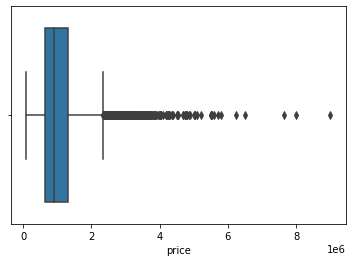

In [ ]:
sns.boxplot(df['price'])

Viendo estos números podemos inferir varias cosas:

- Casi todos nuestros datos están concentrados en valores menores a 2 000 000.
- Eso quiere decir que tenemos algunos valores atípicos *demasiado* grandes (si los comparamos con el resto de los valores)
- La mediana nos estaba dando un número más cercano al verdadero "valor típico" que el promedio.
- El promedio tenía un sesgo hacia arriba debido a los valores extremadamente grandes.
- El rango entre el valor máximo y mínimo no nos da una medida representativa de qué valores pueden tomar nuestros datos.

#### Rango intercuartílico

Otra medida muy común es lo que llamamos el rango intercuartílico, que es la diferencia entre el percentil 75 y el percentil 25. Este número nos da una idea del rango que tienen los valores más cercanos al valor típico.

En nuestro ejemplo, nuestro rango intercuartílico sería:

In [ ]:
df["price"].quantile(0.75) - df["price"].quantile(0.25)

685000.0

Podemos observar que el rango de los "valores típicos" es muchísimo menor al rango total de nuestros datos.

¡En la próxima sesión vamos a aprender a visualizar estas estadísticas para que las relaciones entre ellas queden mucho más claras!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>